# 618 Project - Cosmetics Product Analysis Part 1

**Team Members**: 
- Ruizhe Wang (Unique Name: wrzwrz)
- Zhiyi Ji (Unique Name: jizhiyi)

## Overview

For our project, we will use the **Sephora Products and Skincare Reviews Dataset**, which contains detailed information on over 8,000 beauty products and 1 million user reviews on skincare product. This dataset offers insights into the beauty industry by providing product details, prices, ingredients, and customer feedback.  

Our main goal is to analyze **what factors drive higher average ratings**. We will examine whether **ingredients, prices, or product and sale types** impact customer satisfaction. Additionally, we will explore user reviews to understand **why certain products underperform**.

Beyond ratings, we’ll explore **trends in user sentiment across skincare brands over time**, looking for shifts in perception and the rise of trends like **"clean beauty."** Additionally, we’ll check for **seasonal variations** in feedback (e.g., more negative reviews in winter).

Finally, we’ll identify **which ingredients are linked to positive or negative experiences**, uncovering patterns in customer preferences or identifying common sources of dissatisfaction.

Through **data manipulation, sentiment analysis, and visualization**, we aim to generate meaningful insights into the factors that influence customer satisfaction and help businesses align their product strategies with consumer preferences.

**3 Real-Life Questions:**

1. What factors drive higher product ratings? Why do some products underperform?
2. How do customer sentiment change over time?
3. Are any ingredients linked to positive or negative experiences of customers?

## Motivation

The beauty and skincare industry has experienced rapid growth, with consumers increasingly seeking products tailored to their specific needs and preferences. Customer reviews play a crucial role in shaping brand reputations and influencing purchasing decisions. By analyzing the Sephora Products and Skincare Reviews Dataset, we aim to uncover what drives **customer satisfaction** by analyzing how factors like **ingredients**, **price** or **product types** affect product ratings.

We are motivated by the rising demand for **"clean beauty"** and shifts in consumer sentiment toward sustainable products. Understanding these trends and **seasonal variations** in reviews can help brands better meet customer expectations and improve their offerings.

Our findings will provide **actionable insights**, helping companies align their products with customer preferences, avoid allergenic ingredients, and **enhance customer experiences** through data-driven strategies.

## Data Sources

**Source:**
- [Kaggle: Sephora Products and Skincare Reviews Dataset](https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews/data)

This dataset was collected in March 2023 and provides detailed information on a variety of beauty and skincare products available on Sephora's online store. It includes both product details and customer reviews, offering a comprehensive view of customer feedback and product features. The dataset is publicly available on Kaggle, a popular data platform, making it suitable for exploratory analysis and machine learning tasks.

## Data Description


The dataset contains two primary components:  
1. **Product Information**  
   - **8,000+ products** from various brands, covering attributes such as:
     - Product name and brand  
     - Price
     - Ingredients and product type (e.g., moisturizer, serum)  
     - Product features, such as whether it is organic, vegan, or chemical-free  

2. **Customer Reviews**  
   - **1 million+ reviews** from users across over 2,000 skincare products, including:
     - **Ratings:** Numerical scores indicating customer satisfaction  
     - **Review text:** User opinions and feedback  
     - **Review metadata:** User appearance features (e.g., skin type) and other users' ratings on the helpfulness of reviews  

The data provides opportunities to explore product pricing trends, ingredient preferences, and customer satisfaction metrics. However, it may contain **missing or noisy values**, particularly in review text and product features, requiring cleaning and preprocessing. By progress, we conduct first-stage analysis on original data.

In [53]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

### Product Information

Firstly, we load the data from existing `csv` file and get an idea of its shape as well as fields included.

In [54]:
product_df = pd.read_csv("Sephora/product_info.csv")

In [55]:
print("product info dataframe shape: ", product_df.shape)
product_df.head()

product info dataframe shape:  (8494, 27)


,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


To get an idea of the general information of the dataset both intuitively and statistically, we use `.info()` and `.describe()` correspondingly to have basic information result, and the outcome is displayed as follows.

In [56]:
print("Basic Information:")
product_df.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   

In [57]:
print("\nSummary Statistics (Numerical):")
product_df.describe()


Summary Statistics (Numerical):


,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8494.000000,8.494000e+03,8216.000000,8216.000000,8494.000000,451.000000,270.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,2754.000000,2754.000000
mean,5422.440546,2.917957e+04,4.194513,448.545521,51.655595,91.168537,20.207889,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622,53.792023,39.665802
std,1709.595957,6.609212e+04,0.516694,1101.982529,53.669234,79.195631,24.327352,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470,58.765894,38.685720
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,5333.000000,3.758000e+03,3.981725,26.000000,25.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000
50%,6157.500000,9.880000e+03,4.289350,122.000000,35.000000,67.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,28.000000
75%,6328.000000,2.684125e+04,4.530525,418.000000,58.000000,108.500000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000,42.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,570.000000,400.000000


### Customer Review

We load data of customer review into dataframes and concat them together into one complete dataframe altogether. after that, we apply similar analysis methods to have an intuitive overview. The results are displayed as follows.

In [58]:
# Reference: https://www.kaggle.com/code/themeeemul/sephora-eda-and-sentiment-analysis-using-pytorch
review_df_1 = pd.read_csv("Sephora/reviews_0-250.csv",index_col = 0, dtype={'author_id':'str'})
review_df_2 = pd.read_csv("Sephora/reviews_250-500.csv",index_col = 0, dtype={'author_id':'str'})
review_df_3 = pd.read_csv("Sephora/reviews_500-750.csv",index_col = 0, dtype={'author_id':'str'})
review_df_4 = pd.read_csv("Sephora/reviews_750-1250.csv",index_col = 0, dtype={'author_id':'str'})
review_df_5 = pd.read_csv("Sephora/reviews_1250-end.csv",index_col = 0, dtype={'author_id':'str'})

# Merge review_df_1 till review_df_6
review_df = pd.concat([review_df_1, review_df_2, review_df_3, review_df_4, review_df_5],axis=0)
print("review_df shape: ",review_df.shape)

review_df shape:  (1094411, 18)


In [59]:
review_df.sample(5)

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
22452,30659066486,1,0.0,0.421875,64,37,27,2022-03-06,I am pretty sure this caused dryness to my ski...,Don’t buy,lightMedium,blue,normal,brown,P479732,Salicylic Acid 2% Anhydrous Solution Pore Clea...,The Ordinary,7.2
466417,5282966502,4,1.0,0.000000,1,1,0,2021-07-21,This seems like a very nice product but as a l...,Another solid serum from Clinique!,lightMedium,brown,dry,black,P473267,Smart Clinical Repair Wrinkle Correcting Serum,CLINIQUE,71.0
463863,1980313732,1,0.0,0.500000,4,2,2,2021-05-23,Dried out my skin like never before... I have ...,COMPLETELY DRIED OUT MY NORMAL/COMBO SKIN,lightMedium,brown,combination,black,P411388,Superfood Air-Whip Lightweight Moisturizer wit...,Youth To The People,48.0
150350,2852781390,4,1.0,1.000000,2,0,2,2021-05-05,I lovee this moisturizer so much it does have ...,My Holygrail Now,light,hazel,normal,brown,P416561,Squalane + Probiotic Balancing Gel Moisturizer,Biossance,54.0
138805,984304089,5,NaN,NaN,0,0,0,2016-11-05,I really like this moisturizer! It has a very ...,Great moisturizer!,NaN,NaN,combination,NaN,P394624,The True Cream Moisturizing Bomb,belif,38.0


In [60]:
print("Basic Information:")
review_df.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 1094411 entries, 0 to 49976
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   author_id                 1094411 non-null  object 
 1   rating                    1094411 non-null  int64  
 2   is_recommended            926423 non-null   float64
 3   helpfulness               532819 non-null   float64
 4   total_feedback_count      1094411 non-null  int64  
 5   total_neg_feedback_count  1094411 non-null  int64  
 6   total_pos_feedback_count  1094411 non-null  int64  
 7   submission_time           1094411 non-null  object 
 8   review_text               1092967 non-null  object 
 9   review_title              783757 non-null   object 
 10  skin_tone                 923872 non-null   object 
 11  eye_color                 884783 non-null   object 
 12  skin_type                 982854 non-null   object 
 13  hair_color     

In [61]:
print("\nSummary Statistics (Numerical):")
review_df.describe()


Summary Statistics (Numerical):


,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,1.094411e+06,926423.000000,532819.000000,1.094411e+06,1.094411e+06,1.094411e+06,1.094411e+06
mean,4.299158e+00,0.839962,0.767782,4.177126e+00,8.948695e-01,3.282257e+00,4.900838e+01
std,1.149444e+00,0.366642,0.317164,2.271524e+01,5.288943e+00,1.967482e+01,4.004338e+01
min,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,4.000000e+00,1.000000,0.652174,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01
50%,5.000000e+00,1.000000,0.928571,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01
75%,5.000000e+00,1.000000,1.000000,3.000000e+00,1.000000e+00,3.000000e+00,6.200000e+01
max,5.000000e+00,1.000000,1.000000,5.464000e+03,1.159000e+03,5.050000e+03,1.900000e+03


## Data Manipulation & Visualization

After the first step of importing, merging and describing data, we go a step further into data manipulation, to process on the data and turn it into a more tidy and easy-to-use format. Alongside, we conduct data visualization to provide us a straightforward display of all kinds of data distribution, so as to give us a clearer sense of the data. Aspects include customers' rating, item price, size, etc.

#### Rating

To see the overall reputation condition of products, we visualized the distribution of customers' rating on all products. Shown below we can see that large percentage of customers give a rating between 4.5-5.0/5.0, indicating that they're satisfied with the products.

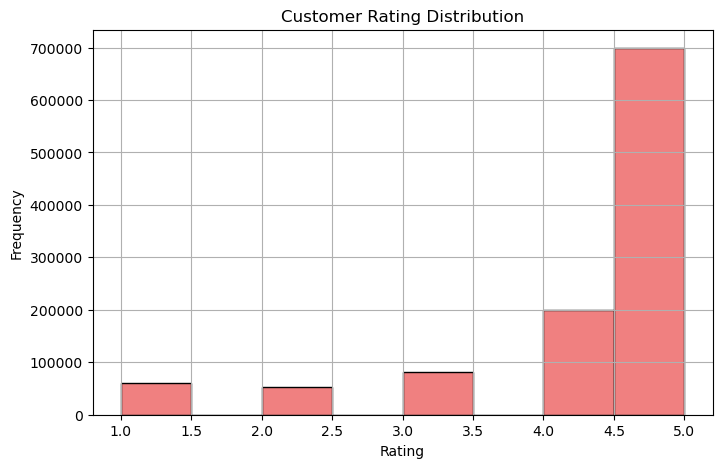

In [62]:
# Customer Rating Distribution
plt.figure(figsize=(8, 5))
review_df['rating'].hist(bins=8, color='lightcoral', edgecolor='black')
plt.title('Customer Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#### Price

To see the price distribution of all products, we create the visualization below. To avoid outliers, we will only visualize products with price <= 350 USD.

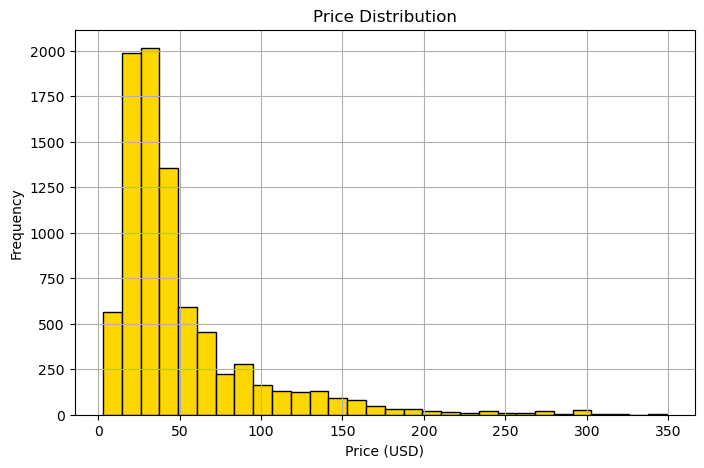

In [63]:
# Price Distribution
# To avoid outliers, we will only visualize products with price <= 350 USD
plt.figure(figsize=(8, 5))
product_df[product_df['price_usd'] <= 350]['price_usd'].hist(bins=30, color='gold', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

#### Size
To see the size of the products, we extract numerical values from certain columns and conduct some datatype conversion to get get the size in both `oz` and `ml`.

In [64]:
product_df['size']

0                   NaN
1        3.4 oz/ 100 mL
2        3.4 oz/ 100 mL
3        3.4 oz/ 100 mL
4        3.4 oz/ 100 mL
             ...       
8489                NaN
8490       2 oz / 60 mL
8491                NaN
8492                NaN
8493    .11 oz / 3.2 mL
Name: size, Length: 8494, dtype: object

In [65]:
product_df['size_oz'] = product_df['size'].str.extract(r'(\d+\.?\d*)\s*oz', expand=False).astype(float)
print(product_df[['size', 'size_oz']].sample(10))

                           size  size_oz
7852  Mini Size Black - 0.17 oz     0.17
758                         NaN      NaN
5147            8.5 oz / 250 mL     8.50
6882              10 oz/ 300 mL    10.00
5119             8.5 oz/ 250 mL     8.50
4107                8 oz/ 226 g     8.00
643               1.7 oz/ 50 mL     1.70
3482                 1 oz/ 30ml     1.00
3470               8 oz/ 236 mL     8.00
4563                        NaN      NaN


In [66]:
product_df['size_ml'] = product_df['size'].str.extract(r'(\d+\.?\d*)\s*mL', expand=False)
product_df['size_ml'] = product_df['size_ml'].astype(float)
print(product_df[['size', 'size_ml']].sample(10))

                 size  size_ml
5289    2.5 oz/ 74 mL     74.0
2576   0.04 oz/ 1.3 g      NaN
3236  0.15 oz/ 4.25 g      NaN
4831   0.33 oz/ 10 mL     10.0
6281              NaN      NaN
7882    0.10 oz/ 3 mL      3.0
4464      0.2 oz/ 6 g      NaN
1736     2 oz / 60 mL     60.0
4693   0.34 oz/ 10 mL     10.0
7535      1 oz/ 30 mL     30.0


### Price Per Unit

To get an idea of the price distribution of products, we conduct some calculation and visualization to see the distribution. The results are show below.

In [67]:
product_df['price_per_oz'] = product_df['price_usd'] / product_df['size_oz']
product_df['price_per_ml'] = product_df['price_usd'] / product_df['size_ml']
product_df[['price_usd', 'size_oz', 'price_per_oz', 'size_ml', 'price_per_ml']].sample(10)

,price_usd,size_oz,price_per_oz,size_ml,price_per_ml
2609,28.0,4.900,5.714286,145.0,0.193103
3442,34.0,5.000,6.800000,187.0,0.181818
1557,36.0,16.500,2.181818,487.0,0.073922
4412,52.0,6.700,7.761194,200.0,0.260000
449,21.0,0.012,1750.000000,NaN,NaN
209,100.0,NaN,NaN,NaN,NaN
896,16.0,1.700,9.411765,50.0,0.320000
1032,55.0,NaN,NaN,NaN,NaN
904,28.0,8.000,3.500000,250.0,0.112000
2762,95.0,1.600,59.375000,50.0,1.900000


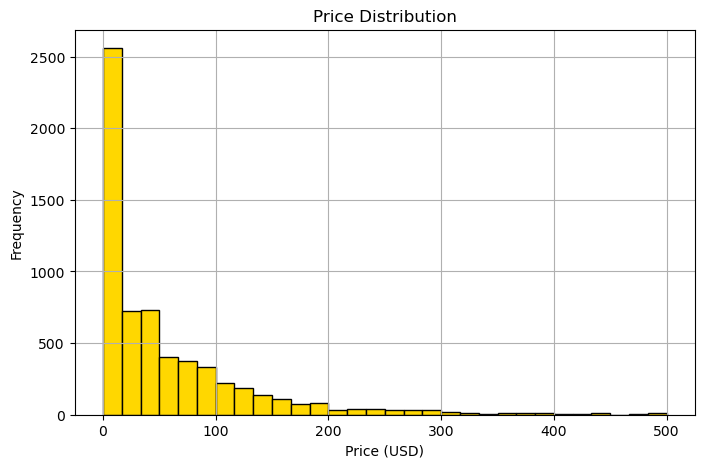

In [68]:
# Price Distribution
# To avoid outliers, we will only visualize products with price <= 350 USD
plt.figure(figsize=(8, 5))
product_df[product_df['price_per_oz'] <= 500]['price_per_oz'].hist(bins=30, color='gold', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

### Category

To have an idea of how many items belong to each category, we conduct counting on both primary and secondary categories.

In [69]:
product_df['primary_category'].value_counts()

primary_category
Skincare           2420
Makeup             2369
Hair               1464
Fragrance          1432
Bath & Body         405
Mini Size           288
Men                  60
Tools & Brushes      52
Gifts                 4
Name: count, dtype: int64

In [70]:
print(product_df['secondary_category'].shape)
product_df['secondary_category'].value_counts()

(8494,)


secondary_category
Women                        875
Hair Styling & Treatments    757
Eye                          711
Face                         659
Moisturizers                 551
Value & Gift Sets            498
Treatments                   466
Shampoo & Conditioner        431
Lip                          411
Cleansers                    361
Candles & Home Scents        263
Brushes & Applicators        246
Body Moisturizers            220
Mini Size                    187
Eye Care                     186
Masks                        166
Cheek                        165
Tools                        153
Makeup                       137
Men                          135
Sunscreen                    109
Skincare                      98
Bath & Shower                 84
High Tech Tools               80
Wellness                      79
Body Care                     69
Self Tanners                  64
Lip Balms & Treatments        61
Hair                          59
Nail                    

### Loves Count

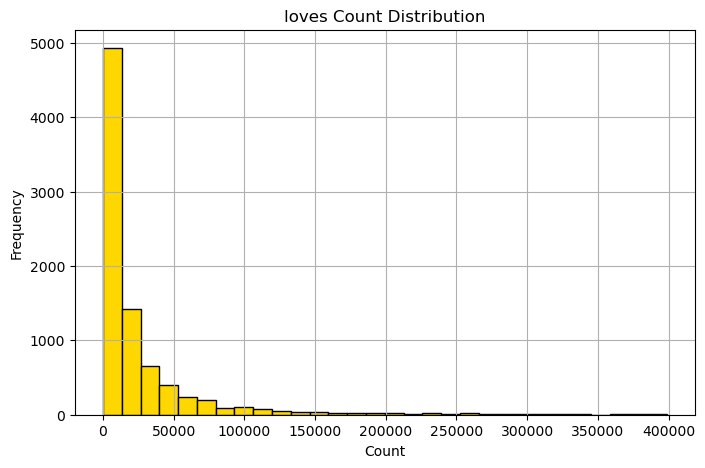

In [71]:
# Price Distribution
# To avoid outliers, we will only visualize products with price <= 350 USD
plt.figure(figsize=(8, 5))
product_df[product_df['loves_count'] < 400000]['loves_count'].hist(bins=30, color='gold', edgecolor='black')
plt.title('loves Count Distribution')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

### Positive/Negative Feedback Percentage

Also we calculate and visualize on the positive and negative feedback percentages of customers, as another indication of their satisfactory level.

In [72]:
review_df['pos_feedback_percentage'] = review_df['total_pos_feedback_count']/review_df['total_feedback_count']
review_df['neg_feedback_percentage'] = review_df['total_neg_feedback_count']/review_df['total_feedback_count']
review_df[['total_pos_feedback_count', 'total_feedback_count', 'pos_feedback_percentage', 'total_neg_feedback_count', 'neg_feedback_percentage']].sample(5)

,total_pos_feedback_count,total_feedback_count,pos_feedback_percentage,total_neg_feedback_count,neg_feedback_percentage
516175,4,5,0.8,1,0.2
484227,0,0,NaN,0,NaN
254595,0,0,NaN,0,NaN
25341,0,0,NaN,0,NaN
30841,0,0,NaN,0,NaN


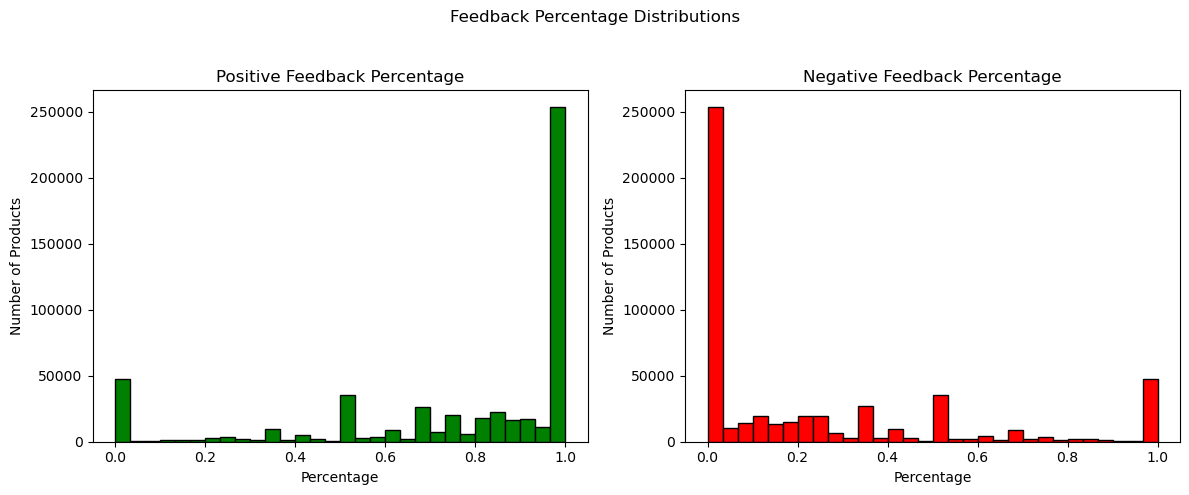

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Feedback Percentage Distributions')

axes[0].hist(review_df['pos_feedback_percentage'], bins=30, color='green', edgecolor='black')
axes[0].set_title('Positive Feedback Percentage')
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('Number of Products')

axes[1].hist(review_df['neg_feedback_percentage'], bins=30, color='red', edgecolor='black')
axes[1].set_title('Negative Feedback Percentage')
axes[1].set_xlabel('Percentage')
axes[1].set_ylabel('Number of Products')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Ingredient
To see the ingredients contained in the products, we processed the strings in the `ingredients` column to extract certain fields, thus making some inferences with the help of visualization tools.

In [74]:
product_df['ingredients'] = product_df['ingredients'].str.strip("[]").str.replace("'", "").str.split(", ")
all_ingredients = product_df['ingredients'].explode().dropna().tolist()
ingredient_counts = Counter(all_ingredients)
ingredient_df = pd.DataFrame(ingredient_counts.items(), columns=['Ingredient', 'Count']).sort_values(by='Count', ascending=False)

In [75]:
ingredient_df.head(5)

,Ingredient,Count
191,Glycerin,4171
212,Phenoxyethanol,3862
211,Caprylyl Glycol,2747
321,Tocopherol,2681
20,Limonene,2537


In [76]:
top20_ingredients = [ingredient for ingredient, _ in ingredient_counts.most_common(20)]

# Add column in product_df for each of the top 20 ingredients for further analysis
for ingredient in top20_ingredients:
    column_name = f'contains_{ingredient}'
    product_df[column_name] = product_df['ingredients'].apply(lambda x: ingredient in x if isinstance(x, list) else False)

In [77]:
columns_to_display = ['product_id'] + [f'contains_{ingredient}' for ingredient in top20_ingredients]
product_df[columns_to_display].head()

,product_id,contains_Glycerin,contains_Phenoxyethanol,contains_Caprylyl Glycol,contains_Tocopherol,contains_Limonene,contains_Ethylhexylglycerin,contains_Dimethicone,contains_Linalool,contains_Silica,...,contains_Citric Acid,contains_Mica,contains_Potassium Sorbate,contains_Water,contains_Caprylic/Capric Triglyceride,contains_Sodium Benzoate,contains_Citronellol,contains_Tocopheryl Acetate,contains_Propanediol,contains_Geraniol
0,P473671,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
1,P473668,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,P473662,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,P473660,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
4,P473658,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


<Figure size 1200x600 with 0 Axes>

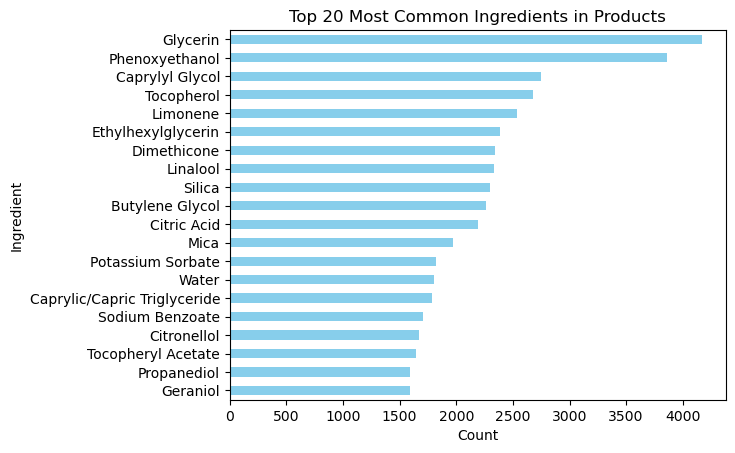

In [78]:
plt.figure(figsize=(12, 6))
ingredient_df.head(20).plot(kind='barh', x='Ingredient', y='Count', legend=False, color='skyblue')
plt.title('Top 20 Most Common Ingredients in Products')
plt.xlabel('Count')
plt.ylabel('Ingredient')
plt.gca().invert_yaxis()
plt.show()

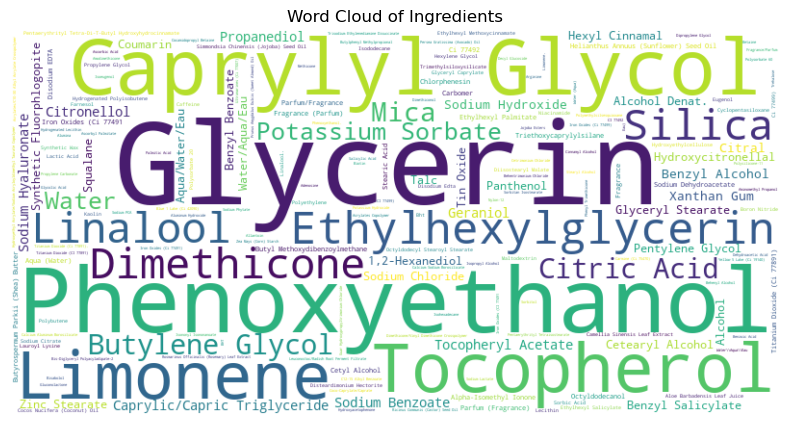

In [79]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ingredient_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Ingredients')
plt.show()

### Merge Two Datasets

After all of the work and analysis above, we then merge the two datasets together for more convenient future work and analysis. The process is shown below. 

In [80]:
# Reference: https://www.kaggle.com/code/themeeemul/sephora-eda-and-sentiment-analysis-using-pytorch
# Merge product_df and review_df
cols_to_use = product_df.columns.difference(review_df.columns)
cols_to_use = list(cols_to_use)
cols_to_use.append('product_id')

Sephora_df = pd.merge(review_df, product_df[cols_to_use], how='outer', on=['product_id', 'product_id'])
print("Sephora Shape: ", Sephora_df.shape)

Sephora Shape:  (1100554, 66)


In [81]:
Sephora_df.sample(5)

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,...,secondary_category,sephora_exclusive,size,size_ml,size_oz,tertiary_category,value_price_usd,variation_desc,variation_type,variation_value
344809,9959043999,5.0,1.0,NaN,0.0,0.0,0.0,2018-08-14,Super clean and hydrating. Love the texture. A...,NaN,...,Moisturizers,0,5 oz / 150 mL Refill,150.0,5.00,Moisturizers,NaN,NaN,Size,5 oz / 150 mL Refill
509769,22531822090,5.0,1.0,NaN,0.0,0.0,0.0,2019-03-13,I love this mask!! It’s very hydrating!!,NaN,...,Masks,0,2 oz/ 59 mL,59.0,2.00,Face Masks,NaN,NaN,Size,2 oz/ 59 mL
264320,182867846,3.0,1.0,NaN,0.0,0.0,0.0,2018-01-17,I really love Tatcha skincare products. The ba...,Feels nice but not longlasting,...,Lip Balms & Treatments,1,0.21 oz/ 6 g,NaN,0.21,NaN,NaN,NaN,Size,0.21 oz/ 6 g
765195,2587263923,4.0,1.0,0.0,2.0,2.0,0.0,2020-11-05,I got this free to try for my opinion on influ...,Nice texture,...,Cleansers,0,5.0 oz/ 150 mL,150.0,5.00,Toners,NaN,NaN,Size,5.0 oz/ 150 mL
229532,2341781491,5.0,1.0,NaN,0.0,0.0,0.0,2019-12-24,This product is awesome! After falling in love...,NaN,...,Eye Care,0,30 pairs - 60 patches,NaN,NaN,Eye Creams & Treatments,NaN,NaN,Size,30 pairs - 60 patches


In [82]:
Sephora_df.describe()

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd,pos_feedback_percentage,neg_feedback_percentage,brand_id,...,online_only,out_of_stock,price_per_ml,price_per_oz,reviews,sale_price_usd,sephora_exclusive,size_ml,size_oz,value_price_usd
count,1.094411e+06,926423.000000,532819.000000,1.094411e+06,1.094411e+06,1.094411e+06,1.094411e+06,532819.000000,532819.000000,1.100554e+06,...,1.100554e+06,1.100554e+06,854407.000000,992297.000000,1.100276e+06,9978.000000,1.100554e+06,854407.000000,992297.000000,31189.000000
mean,4.299158e+00,0.839962,0.767782,4.177126e+00,8.948695e-01,3.282257e+00,4.900838e+01,0.767782,0.232218,5.547432e+03,...,1.106088e-01,3.182942e-02,1.345774,40.577942,2.151789e+03,16.888082,3.239396e-01,67.240317,3.073330,114.830038
std,1.149444e+00,0.366642,0.317164,2.271524e+01,5.288943e+00,1.967482e+01,4.004338e+01,0.317164,0.317164,1.493821e+03,...,3.136473e-01,1.755458e-01,1.571010,141.789132,2.524573e+03,13.961803,4.679775e-01,55.643145,7.784536,62.313042
min,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000,0.000000,1.063000e+03,...,0.000000e+00,0.000000e+00,0.020833,0.130682,1.000000e+00,1.750000,0.000000e+00,0.160000,0.000200,0.000000
25%,4.000000e+00,1.000000,0.652174,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01,0.652174,0.000000,5.626000e+03,...,0.000000e+00,0.000000e+00,0.333333,9.990000,5.390000e+02,7.000000,0.000000e+00,30.000000,1.000000,68.000000
50%,5.000000e+00,1.000000,0.928571,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01,0.928571,0.071429,6.073000e+03,...,0.000000e+00,0.000000e+00,0.950000,26.470588,1.337000e+03,18.000000,0.000000e+00,50.000000,1.700000,102.000000
75%,5.000000e+00,1.000000,1.000000,3.000000e+00,1.000000e+00,3.000000e+00,6.200000e+01,1.000000,0.347826,6.234000e+03,...,0.000000e+00,0.000000e+00,1.866667,50.000000,2.891000e+03,20.000000,1.000000e+00,95.000000,3.380000,142.000000
max,5.000000e+00,1.000000,1.000000,5.464000e+03,1.159000e+03,5.050000e+03,1.900000e+03,1.000000,1.000000,8.020000e+03,...,1.000000e+00,1.000000e+00,131.250000,110000.000000,2.128100e+04,320.000000,1.000000e+00,1000.000000,176.000000,617.000000


### Data Cleaning

Finally, to deal with potential `NaN` values in the data of all kinds, we conduct data cleaning approaches shown as follows. 

In [83]:
# 1. Check for missing values
print("Missing values per column:")
print(Sephora_df.isnull().sum())

Missing values per column:
author_id                  6143
rating                     6143
is_recommended           174131
helpfulness              567735
total_feedback_count       6143
                         ...   
tertiary_category        161894
value_price_usd         1069365
variation_desc          1091034
variation_type            52560
variation_value           64644
Length: 66, dtype: int64


In [84]:
# 2. Deal with missing values

missing_counts = Sephora_df.isna().sum()
threshold = 1
columns_to_drop = missing_counts[missing_counts > threshold].index
for col in columns_to_drop:
    print(f"{col}: {missing_counts[col]} missing values")

author_id: 6143 missing values
rating: 6143 missing values
is_recommended: 174131 missing values
helpfulness: 567735 missing values
total_feedback_count: 6143 missing values
total_neg_feedback_count: 6143 missing values
total_pos_feedback_count: 6143 missing values
submission_time: 6143 missing values
review_text: 7587 missing values
review_title: 316797 missing values
skin_tone: 176682 missing values
eye_color: 215771 missing values
skin_type: 117700 missing values
hair_color: 232911 missing values
product_name: 6143 missing values
brand_name: 6143 missing values
price_usd: 6143 missing values
pos_feedback_percentage: 567735 missing values
neg_feedback_percentage: 567735 missing values
child_max_price: 644796 missing values
child_min_price: 644796 missing values
highlights: 115729 missing values
ingredients: 22843 missing values
price_per_ml: 246147 missing values
price_per_oz: 108257 missing values
reviews: 278 missing values
sale_price_usd: 1090576 missing values
secondary_category:

Considering product name the unique identifier without which analysis becomes meaningless, we choose to drop the rows where `product_name` is missing in the first place.

In [85]:
# Drop rows with no product information (NaN in column 'product_name')
Sephora_df = Sephora_df.dropna(subset=['product_name'])

For other columns with missing values, we decide to set the threshold to be `30%`, screening off the fields that are not enough regarding data fill rate. This can ensure a better 

In [86]:
# Identify columns with too missing values (if threshold > 30% missing)
threshold = len(Sephora_df) * 0.3
columns_to_drop = missing_counts[missing_counts > threshold].index
print("Columns with more than 30% missing values:")
for col in columns_to_drop:
    print(f"{col}: {missing_counts[col]} missing values")

Columns with more than 30% missing values:
helpfulness: 567735 missing values
pos_feedback_percentage: 567735 missing values
neg_feedback_percentage: 567735 missing values
child_max_price: 644796 missing values
child_min_price: 644796 missing values
sale_price_usd: 1090576 missing values
value_price_usd: 1069365 missing values
variation_desc: 1091034 missing values


After that, we fill up the `NaN` values following certain rules correspondingly. The details are displayed below in the code block.

In [87]:
import pandas as pd

# 1. Handle feedback-related columns
Sephora_df = Sephora_df.assign(
    helpfulness=Sephora_df['helpfulness'].fillna(0),
    pos_feedback_percentage=Sephora_df['pos_feedback_percentage'].fillna(1),
    neg_feedback_percentage=Sephora_df['neg_feedback_percentage'].fillna(0),
    is_recommended=Sephora_df['is_recommended'].fillna(1)
)

# 2. Handle price-related columns by filling with price_usd
Sephora_df = Sephora_df.assign(
    child_max_price=Sephora_df['child_max_price'].fillna(Sephora_df['price_usd']),
    child_min_price=Sephora_df['child_min_price'].fillna(Sephora_df['price_usd']),
    sale_price_usd=Sephora_df['sale_price_usd'].fillna(Sephora_df['price_usd']),
    value_price_usd=Sephora_df['value_price_usd'].fillna(Sephora_df['price_usd'])
)

# 3. Handle variation-related columns
Sephora_df = Sephora_df.assign(
    variation_desc=Sephora_df['variation_desc'].fillna('No variation'),
    variation_type=Sephora_df['variation_type'].fillna('Unknown'),
    variation_value=Sephora_df['variation_value'].fillna('Unknown')
)

# 4. Handle product and review metadata
Sephora_df = Sephora_df.assign(
    review_text=Sephora_df['review_text'].fillna('No review provided'),
    review_title=Sephora_df['review_title'].fillna('No title'),
    tertiary_category=Sephora_df['tertiary_category'].fillna('Uncategorized')
)

# 5. Handle skin, hair, and eye attributes
Sephora_df = Sephora_df.assign(
    skin_tone=Sephora_df['skin_tone'].fillna('Not specified'),
    eye_color=Sephora_df['eye_color'].fillna('Not specified'),
    skin_type=Sephora_df['skin_type'].fillna('Not specified'),
    hair_color=Sephora_df['hair_color'].fillna('Not specified')
)

# 6. Handle ingredient and highlight columns
Sephora_df = Sephora_df.assign(
    ingredients=Sephora_df['ingredients'].fillna('Ingredients not listed'),
    highlights=Sephora_df['highlights'].fillna('No highlights available')
)

# 7. Handle size-related columns
Sephora_df = Sephora_df.assign(
    size=Sephora_df['size'].fillna('Unknown size'),
    size_ml=Sephora_df['size_ml'].fillna(Sephora_df['size_ml'].median()),
    size_oz=Sephora_df['size_oz'].fillna(Sephora_df['size_oz'].median())
)

# 8. Handle price per unit columns
Sephora_df = Sephora_df.assign(
    price_per_ml=Sephora_df['price_per_ml'].fillna(Sephora_df['price_per_ml'].median()),
    price_per_oz=Sephora_df['price_per_oz'].fillna(Sephora_df['price_per_oz'].median())
)

# 9. Print the result to confirm the missing values have been handled
missing_counts_after = Sephora_df.isna().sum()
print("Missing values after processing:")
print(missing_counts_after[missing_counts_after > 0])

Missing values after processing:
Series([], dtype: int64)


In [88]:
numerical_cols = Sephora_df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = Sephora_df.select_dtypes(include=['object']).columns

In [89]:
# 3. Strip whitespace from string columns (if any)
Sephora_df[categorical_cols] = Sephora_df[categorical_cols].apply(lambda x: x.str.strip())

## Data Analysis

### Relationship between Product Average Ratings and Other Factors

Here, we will focus on **product_df** as our primary interest lies in understanding how **product-related factors** influence **average ratings of the product**.

In [90]:
product_df.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price', 'size_oz', 'size_ml',
       'price_per_oz', 'price_per_ml', 'contains_Glycerin',
       'contains_Phenoxyethanol', 'contains_Caprylyl Glycol',
       'contains_Tocopherol', 'contains_Limonene',
       'contains_Ethylhexylglycerin', 'contains_Dimethicone',
       'contains_Linalool', 'contains_Silica', 'contains_Butylene Glycol',
       'contains_Citric Acid', 'contains_Mica', 'contains_Potassium Sorbate',
       'contains_Water', 'contains_Caprylic/Capric Triglyceride',
       'contains_Sodium Benzoate', 'contains_Ci

#### Correlation

In [91]:
correlation_features = ['rating', 'price_usd', 'price_per_oz', 'size_oz', 'loves_count', 'reviews']

correlation_data = product_df[correlation_features]

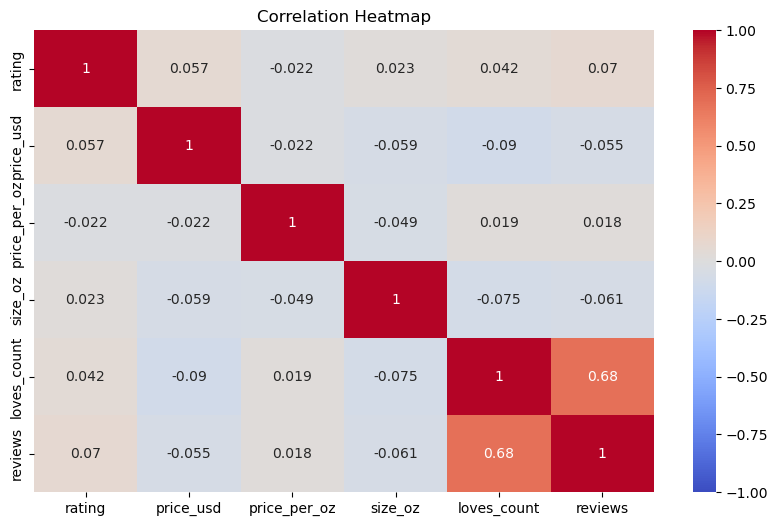

In [92]:
corr_matrix = correlation_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [93]:
# Relationship between rating and top 10 ingredients
correlation_features = ['rating', 'contains_Glycerin',
       'contains_Phenoxyethanol', 'contains_Caprylyl Glycol',
       'contains_Tocopherol', 'contains_Limonene',
       'contains_Ethylhexylglycerin', 'contains_Dimethicone',
       'contains_Linalool', 'contains_Silica', 'contains_Butylene Glycol']
correlation_data = product_df[correlation_features]

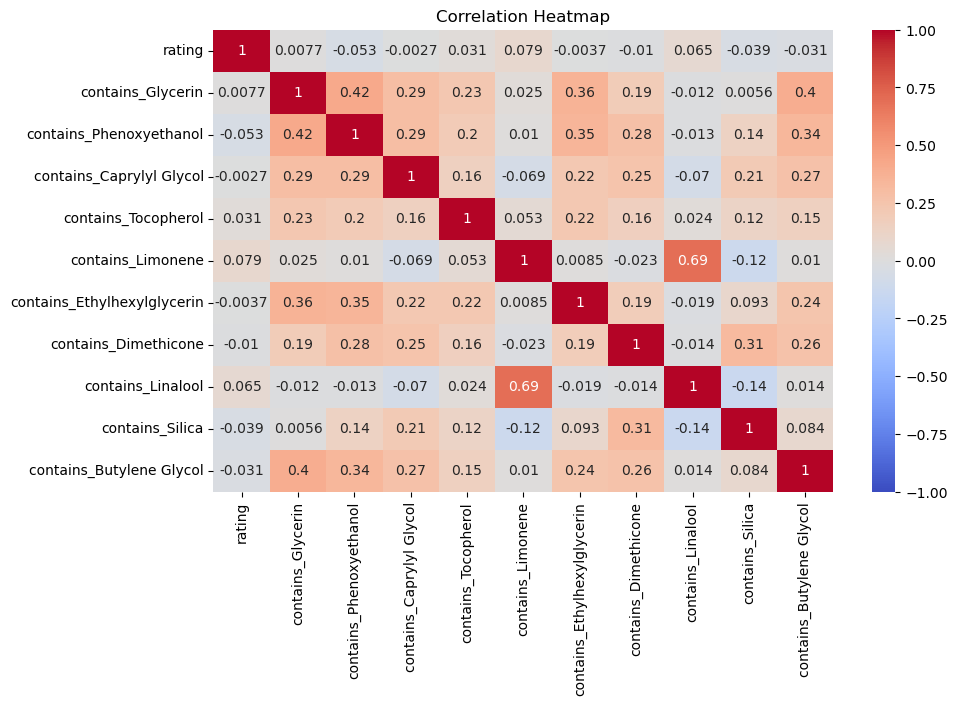

In [94]:
corr_matrix = correlation_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

From the results above, we can observe that there is **no significant relationship** between loves_count, reviews, ingredients, and rating. However, we will analyze size and prices in more detail.

#### Price v.s. Rating

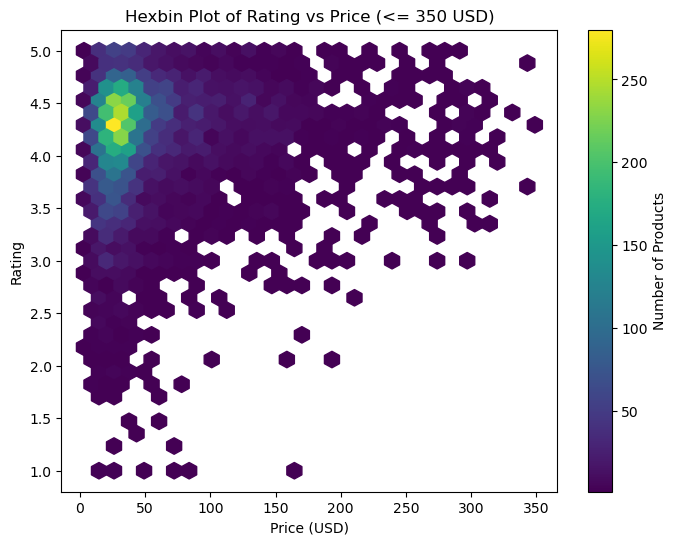

In [95]:
# Hexbin Plot (Rating vs Price)
# Filter products with price <= 350 USD
filtered_df = product_df[product_df['price_usd'] <= 350]

plt.figure(figsize=(8, 6))
plt.hexbin(filtered_df['price_usd'], filtered_df['rating'], gridsize=30, 
           cmap='viridis', mincnt=1)

plt.colorbar(label='Number of Products')
plt.xlabel('Price (USD)')
plt.ylabel('Rating')
plt.title('Hexbin Plot of Rating vs Price (<= 350 USD)')
plt.show()

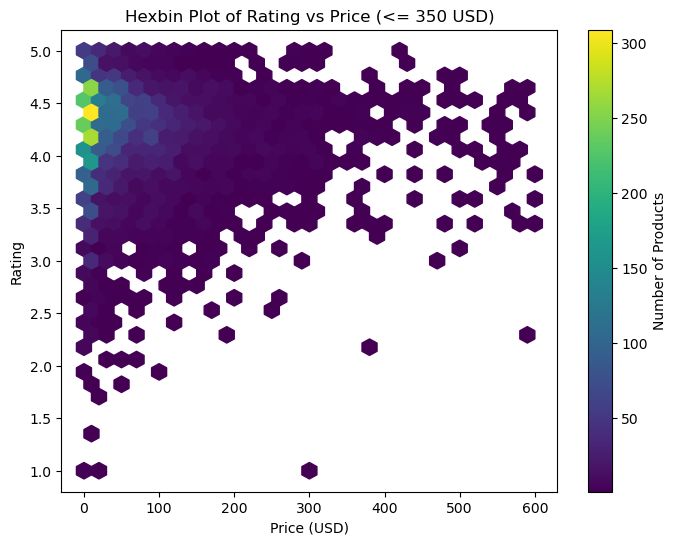

In [96]:
# Hexbin Plot (Rating vs Unit Price)
# Filter products with unit price <= 600 USD
filtered_df = product_df[product_df['price_per_oz'] <= 600]

plt.figure(figsize=(8, 6))
plt.hexbin(filtered_df['price_per_oz'], filtered_df['rating'], gridsize=30, 
           cmap='viridis', mincnt=1)

plt.colorbar(label='Number of Products')
plt.xlabel('Price (USD)')
plt.ylabel('Rating')
plt.title('Hexbin Plot of Rating vs Price (<= 350 USD)')
plt.show()

C:\Users\86151\AppData\Local\Temp\ipykernel_30088\3323118198.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_bin = product_df.groupby('price_bin')['rating'].mean().reset_index()


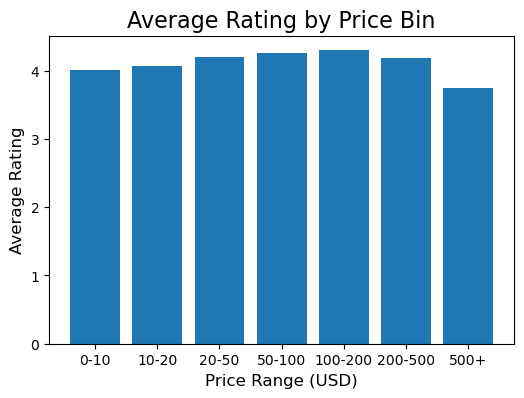

In [97]:
bins = [0, 10, 20, 50, 100, 200, 500, product_df['price_usd'].max()]
labels = ['0-10', '10-20', '20-50', '50-100', '100-200', '200-500', f'500+']

product_df['price_bin'] = pd.cut(product_df['price_usd'], bins=bins, labels=labels, include_lowest=True)

avg_rating_by_bin = product_df.groupby('price_bin')['rating'].mean().reset_index()

plt.figure(figsize=(6, 4))
plt.bar(avg_rating_by_bin['price_bin'], avg_rating_by_bin['rating'])
plt.title('Average Rating by Price Bin', fontsize=16)
plt.xlabel('Price Range (USD)', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

plt.show()

C:\Users\86151\AppData\Local\Temp\ipykernel_30088\716176245.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_bin = product_df.groupby('price_bin')['rating'].mean().reset_index()


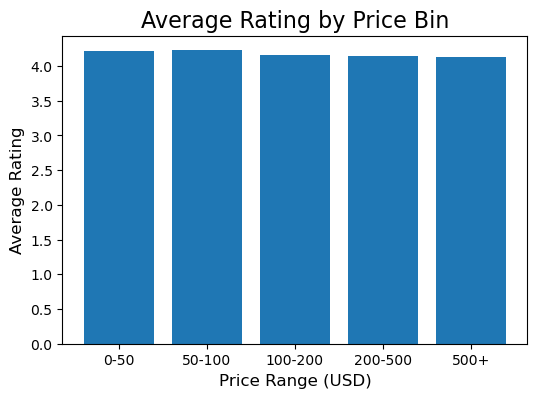

In [98]:
bins = [0, 50, 100, 200, 500, product_df['price_per_oz'].max()]
labels = ['0-50', '50-100', '100-200', '200-500', f'500+']

product_df['price_bin'] = pd.cut(product_df['price_per_oz'], bins=bins, labels=labels, include_lowest=True)

avg_rating_by_bin = product_df.groupby('price_bin')['rating'].mean().reset_index()

plt.figure(figsize=(6, 4))
plt.bar(avg_rating_by_bin['price_bin'], avg_rating_by_bin['rating'])
plt.title('Average Rating by Price Bin', fontsize=16)
plt.xlabel('Price Range (USD)', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

plt.show()

#### Analysis

From the figure above, we can observe **slight differences between total price and average rating**. However, **no noticeable differences** are found between unit price and average rating.  

Additionally, if we aim to **achieve higher ratings**, setting the price within the **20-200** range may be effective.

### Category v.s. Rating

In [99]:
# Primary Category vs Average Rating
product_df['rating'] = pd.to_numeric(product_df['rating'], errors='coerce')

avg_rating_by_category = product_df.groupby('primary_category')['rating'].mean().\
    reset_index().sort_values(by='rating', ascending=False)
avg_rating_by_category.columns = ['primary_category', 'average_rating']
print(avg_rating_by_category)

  primary_category  average_rating
2            Gifts        4.563450
5              Men        4.504992
8  Tools & Brushes        4.271458
1        Fragrance        4.230889
7         Skincare        4.228890
3             Hair        4.201113
0      Bath & Body        4.195015
4           Makeup        4.146845
6        Mini Size        4.005665


In [100]:
# Secondary Category vs Average Rating
avg_rating_by_category = product_df.groupby('secondary_category')['rating'].mean().\
    reset_index().sort_values(by='rating', ascending=False)
avg_rating_by_category.columns = ['secondary_category', 'average_rating']
print(avg_rating_by_category)

           secondary_category  average_rating
29                Other Needs        4.682980
32                    Shaving        4.641243
25                        Men        4.548450
23            Makeup Palettes        4.513805
18                 Hair Tools        4.496691
4          Beauty Supplements        4.421550
1                 Bath & Body        4.377929
34                   Skincare        4.353302
10                      Cheek        4.323424
3          Beauty Accessories        4.322500
11                  Cleansers        4.314373
37                 Treatments        4.306111
8       Brushes & Applicators        4.305875
27               Moisturizers        4.277424
24                      Masks        4.259330
17  Hair Styling & Treatments        4.244675
7           Body Moisturizers        4.237487
40                      Women        4.233255
31      Shampoo & Conditioner        4.214010
20                        Lip        4.209429
2               Bath & Shower     

In [101]:
# Secondary Category vs Average Rating
avg_rating_by_category = product_df.groupby('tertiary_category')['rating'].mean().\
    reset_index().sort_values(by='rating', ascending=False)
avg_rating_by_category.columns = ['tertiary_category', 'average_rating']
print(avg_rating_by_category)

              tertiary_category  average_rating
82                  Lip Brushes        4.711833
108                     Shaving        4.709130
91   Makeup Bags & Travel Cases        4.690660
12                Body Products        4.682980
54                    Face Wash        4.624411
..                          ...             ...
32   Deodorant & Antiperspirant        3.764542
5      Bath Soaks & Bubble Bath        3.705443
30                 Damaged Hair        3.696500
3                 BB & CC Cream        3.669130
93    Manicure & Pedicure Tools        2.285700

[118 rows x 2 columns]


#### Analysis  

From the results, we can observe the following trends:

**Primary Category:**  
- **Top performers:** "Gifts" (4.56) and "Men" (4.50) have the highest average ratings, indicating that these product categories are highly appreciated by customers. This may suggest that these products meet customer expectations well, potentially due to their quality, usability, or alignment with specific customer needs.  
- **Lower performers:** "Mini Size" (4.00) and "Makeup" (4.14) receive comparatively lower ratings, suggesting room for improvement. It’s possible that mini-sized products offer less value or that makeup items may not fully meet customer expectations in terms of variety, durability, or performance.  

**Secondary Category:**  
- **Highest rated:** "Other Needs" (4.68) and "Shaving" (4.64) receive the highest scores, indicating strong customer satisfaction. Shaving products might perform well due to their practical utility, while "Other Needs" likely covers niche items that satisfy specific demands.  
- **Lower ratings:** Categories like "Nail" (3.88) and "Fragrance" (3.87) are rated lower, possibly due to limited product effectiveness, insufficient variety, or unmet customer expectations. The subjective nature of fragrances and varying preferences in nail care products could contribute to these lower ratings.  

**Tertiary Category:**  
- **Top categories:** "Lip Brushes" (4.71) and "Shaving" (4.71) are among the highest-rated, suggesting these niche products perform well. This could imply that customers appreciate specialized tools that enhance their beauty routines or provide value through functionality.  
- **Lowest performers:** "Manicure & Pedicure Tools" (2.29) and "BB & CC Cream" (3.67) have the lowest average ratings, indicating dissatisfaction or unmet expectations. This could result from poor product quality, lack of innovation, or insufficient effectiveness compared to competitors.  

These results highlight areas where certain products excel and others fall short, suggesting that focusing on **customer feedback and product refinement** in the lower-performing categories could enhance overall satisfaction.

#### Brand vs Average Rating

In [102]:
# brand_name vs Average Rating
avg_rating_by_category = product_df.groupby('brand_name')['rating'].mean().\
    reset_index().sort_values(by='rating', ascending=False)
avg_rating_by_category.columns = ['brand_name', 'average_rating']
print(avg_rating_by_category)

           brand_name  average_rating
78        Erno Laszlo        5.000000
10              Aquis        4.904800
158   MACRENE actives        4.889420
161              MARA        4.823860
32             CANOPY        4.813733
..                ...             ...
47   Christophe Robin        3.154767
101    Good Dye Young        3.062050
194           Overose        2.848450
253         The Maker             NaN
299        philosophy             NaN

[304 rows x 2 columns]


#### Analysis

**Top Brands:**
- **Erno Laszlo** (5.00), **Aquis** (4.90), **MACRENE actives** (4.89), and **MARA** (4.82) show high customer satisfaction, likely due to consistent quality and meeting customer needs.

**Lower-Rated Brands:**
- **Christophe Robin** (3.15) and **Good Dye Young** (3.06) have lower ratings, suggesting issues with product quality or unmet expectations.

**Lowest-Rated Brand:**
- **Overose** (2.85) indicates significant dissatisfaction, likely due to performance issues or poor customer experience.

High-performing brands should maintain their quality, while underperforming brands need to address product and customer experience issues.

#### Rating v.s. Online or not

In [103]:
# Online vs Average Rating
avg_rating_by_category = product_df.groupby('online_only')['rating'].mean().\
    reset_index().sort_values(by='rating', ascending=False)
avg_rating_by_category.columns = ['online_only', 'average_rating']
print(avg_rating_by_category)

   online_only  average_rating
0            0        4.200374
1            1        4.172408


In [104]:
# Calculate average rating by both primary category and online_only status
avg_rating_online_category = product_df.groupby(['primary_category', 'online_only'])['rating'].mean().reset_index()

# Pivot the data for better comparison
pivot_table = avg_rating_online_category.pivot(index='primary_category', columns='online_only', values='rating')

pivot_table.columns = ['Non-Online', 'Online']

# Calculate the rating difference between online and non-online categories
pivot_table['Rating_Difference'] = pivot_table['Online'] - pivot_table['Non-Online']

pivot_table = pivot_table.sort_values(by='Rating_Difference', ascending=False)
print(pivot_table)

                  Non-Online    Online  Rating_Difference
primary_category                                         
Mini Size           3.998237  4.058100           0.059863
Skincare            4.218118  4.271438           0.053320
Tools & Brushes     4.271543  4.271013          -0.000530
Hair                4.205973  4.191046          -0.014927
Bath & Body         4.222076  4.151288          -0.070788
Fragrance           4.259239  4.144556          -0.114683
Men                 4.542989  4.382857          -0.160132
Makeup              4.164505  3.998730          -0.165774
Gifts               4.563450       NaN                NaN


##### Analysis

**Overall Comparison:**  
- **Non-online products** (4.20) have slightly higher ratings than **online-only products** (4.17).

**Primary Category Comparison:**  
1. **Higher Online Ratings:**  
   - **Mini Size:** 4.06 vs. 3.99 (+0.06) – More convenient for online purchases.  
   - **Skincare:** 4.27 vs. 4.22 (+0.05) – Benefits from detailed product information online.

2. **Minimal Difference:**  
   - **Tools & Brushes:** 4.27 vs. 4.27 (-0.0005) – Similar satisfaction across both channels.

3. **Higher Non-Online Ratings:**  
   - **Makeup:** 4.16 vs. 3.99 (-0.17) – In-person trials likely preferred.  
   - **Fragrance:** 4.26 vs. 4.14 (-0.11) – Harder to evaluate online.  
   - **Men:** 4.54 vs. 4.38 (-0.16) – Benefits from in-store accessibility and recommendations.

**Conclusion:**
- **Products like Mini Size and Skincare** benefit from online availability, likely due to convenience and access to reviews.
- **Makeup and Fragrances** perform better offline, suggesting that in-store experiences play a key role in customer satisfaction for these categories.
- **Distribution Strategy Implication:** Focusing on enhancing **online shopping experiences for Makeup and Fragrances** (e.g., offering virtual try-ons) could help improve ratings.